In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

def gaussian_mlp(state_dims, output_dims, hidden_size, hidden_activation='relu', output_activation='tanh',
                 name='gaussian_mlp'):
    state_input_layer = layers.Input(shape=(state_dims,), name=name + '_state_input_layer',
                                     )

    hidden_layer = layers.Dense(hidden_size[0], activation=hidden_activation, name=name + '_hidden_' + str(0),
                                )(
        state_input_layer)

    for i, num in enumerate(hidden_size):
        if i == 0:
            continue
        hidden_layer = layers.Dense(num, activation=hidden_activation, name=name + '_hidden_' + str(i),
                                    )(hidden_layer)

    mu = layers.Dense(output_dims, activation=output_activation, name=name + '_mu',
                      )(hidden_layer)

    sigma = layers.Dense(output_dims, activation='softplus', name=name + '_sigma_output',
                         )(hidden_layer)

    model = tf.keras.Model(inputs=state_input_layer,
                           outputs=[mu, sigma],
                           name=name + '_model', )

    return model

def mlp(state_dims, output_dims, hidden_size, hidden_activation='relu', output_activation=None,
        name='mlp'):
    state_input_layer = layers.Input(shape=(state_dims,), name=name + '_state_input_layer')

    hidden_layer = layers.Dense(hidden_size[0], activation=hidden_activation, name=name + '_hidden_' + str(0))(
        state_input_layer)

    for i, num in enumerate(hidden_size):
        if i == 0:
            continue
        hidden_layer = layers.Dense(num, activation=hidden_activation, name=name + '_hidden_' + str(i))(hidden_layer)

    output_layer = layers.Dense(output_dims,activation=output_activation)(hidden_layer)

    model = tf.keras.Model(inputs=state_input_layer,
                           outputs=output_layer,
                           name=name + '_model')

    return model

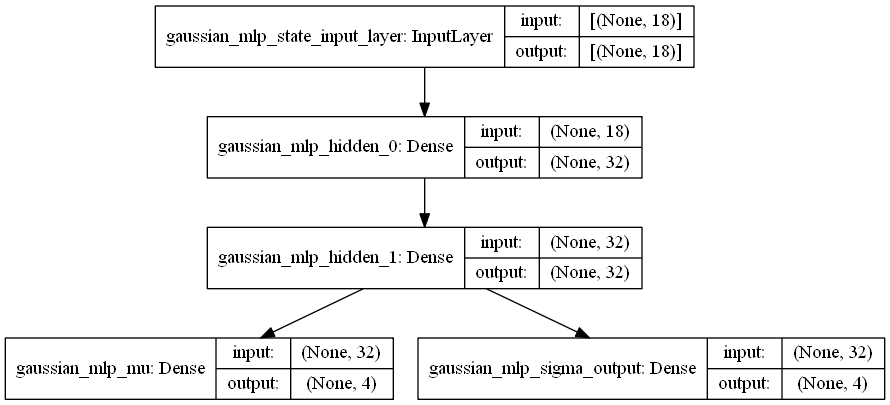

In [2]:
ppo_model = gaussian_mlp(18, 4, (32, 32))
tf.keras.utils.plot_model(ppo_model, 'gaussian_mlp.png', show_shapes=True)

In [3]:
import numpy as np
observation = np.ones((1,18))
mu,sigma = ppo_model(observation)
print(mu,sigma)

tf.Tensor([[-0.02315651 -0.03295022  0.0644947  -0.25107315]], shape=(1, 4), dtype=float32) tf.Tensor([[0.6550598  0.66362065 0.55094874 0.71680474]], shape=(1, 4), dtype=float32)


In [10]:
import tensorflow_probability as tfp
dist = tfp.distributions.Normal(mu,sigma)
action1 = dist.sample(1)
action2 = tf.squeeze(dist.sample(1), axis=0)[0]
print(action1)
print(action2)
prob = tf.squeeze(dist.prob(action2), axis=0)[0]
print(prob)

tf.Tensor([[[-0.80295575  0.28875265  0.3949629  -1.4280735 ]]], shape=(1, 1, 4), dtype=float32)
tf.Tensor([-0.59076804 -0.05633606  0.39402497 -1.078527  ], shape=(4,), dtype=float32)
tf.Tensor(0.4183973, shape=(), dtype=float32)


In [5]:
states = np.ones((4,18))
mus,sigmas = ppo_model(states)
# print(mus)
dists = tfp.distributions.Normal(mus,sigmas)
actions = dists.sample()
print(actions)

tf.Tensor(
[[ 0.35845062 -0.0578212  -1.0287491   0.30565703]
 [-0.18864717 -0.16497958  0.6424022   0.88124466]
 [ 0.2287464   0.00384312  0.04488944 -0.67821205]
 [-0.66608405 -1.1358469   0.68245125 -0.37918526]], shape=(4, 4), dtype=float32)


In [6]:
print(actions[1:])
print(actions[:-1])

tf.Tensor(
[[-0.18864717 -0.16497958  0.6424022   0.88124466]
 [ 0.2287464   0.00384312  0.04488944 -0.67821205]
 [-0.66608405 -1.1358469   0.68245125 -0.37918526]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[ 0.35845062 -0.0578212  -1.0287491   0.30565703]
 [-0.18864717 -0.16497958  0.6424022   0.88124466]
 [ 0.2287464   0.00384312  0.04488944 -0.67821205]], shape=(3, 4), dtype=float32)
